<a href="https://colab.research.google.com/github/srikanth7615/SRI/blob/main/Quiz_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
4/4 [==============================] - 5s 357ms/step - loss: 0.0872 - val_loss: 0.2784
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0371 - val_loss: 0.1004
Epoch 3/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0123 - val_loss: 0.0306
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0173 - val_loss: 0.0321
Epoch 5/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0120 - val_loss: 0.0498
Epoch 6/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0099 - val_loss: 0.0635
Epoch 7/100
4/4 [==============================] - 0s 21ms/step - loss: 0.0111 - val_loss: 0.0581
Epoch 8/100
4/4 [==============================] - 0s 23ms/step - loss: 0.0106 - val_loss: 0.0419
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0096 - val_loss: 0.0360
Epoch 10/100
4/4 [==============================] - 0s 22ms/step - loss: 0.0097 - val_loss: 0.0344
Epoch 11/100
4/4 [

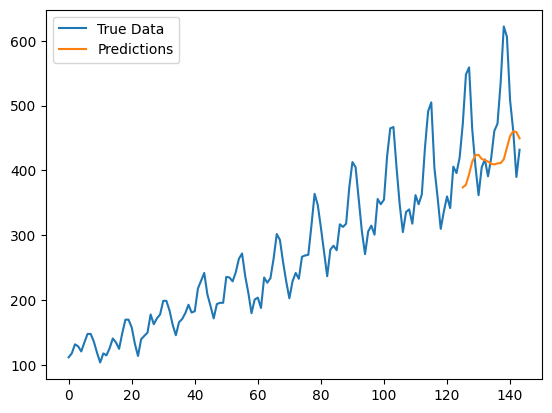

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt

# Load and preprocess dataset
# Replace 'data.csv' with your dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data =pd.read_csv(url, header=0, parse_dates=[0], index_col=0)


scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Split dataset into training and test sets
train_size = int(len(data_normalized) * 0.8)
train_data, test_data = data_normalized[:train_size], data_normalized[train_size:]

# Prepare data for LSTM
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10  # Number of time steps to look back
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualize predictions
plt.plot(scaler.inverse_transform(data_normalized), label='True Data')
plt.plot(range(train_size + time_steps, len(data_normalized)), predictions, label='Predictions')
plt.legend()
plt.show()

# Discussion and analysis
# Discuss your findings, challenges, and optimization steps here